# Two-dimensional (2D) cellular automaton
This is an extension of the elementary CA. Here, we have cells in a two-dimensional grid. Each cell has
- **state:** which can be zero or one.
- **neighborhood:** famous neighborhoods are the **Moore** (with eight neighbors) and the **von Neumann** (with four neighbors).

Again, we have a **set of rules** that are applied to the current cell and its neighborhood to update the state of the cell.

**Hint:** A well-known 2D CA is the **Conway's game of life**.
<br> Here, we use the **von Neumann** neighborhood to create some interesting patterns.

###### by Hamed Shah-Hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# the next generation of cells
def update(neighborhood='neumann', no_alive_neighbors=[1]):
    global nextCells,cells
    if neighborhood=='neumann': #von Neumann
        Nset=[(-1,0),(1,0),(0,-1),(0,1)] 
    else: #extended von Neumann 
        Nset=[(-2,0),(-1,0),(1,0),(0,-1),(0,1),(0,2),(2,0),(0,-2)]        
    for x in range(gridW):
        for y in range(gridH):
            noNeighbors=0
            for x2,y2 in Nset: 
                    xn=x+x2; yn=y+y2
                    if (0<=xn<gridW) and (0<=yn<gridH):
                        if cells[yn,xn]==0:
                            noNeighbors+=1
            if cells[y,x]==0:
                # alive stays alive
                nextCells[y,x]=0 
            else:
                #dead becomes alive having no. of alive neighbors 
                if noNeighbors in no_alive_neighbors: 
                    nextCells[y,x]=0               
    cells=nextCells.copy()           

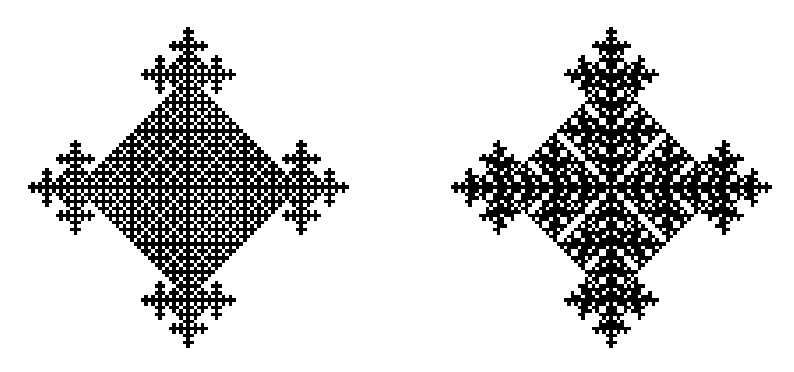

In [3]:
gridW, gridH = 100,100
#holds the cells of cellular automatun
cells=255*np.ones((gridH,gridW),dtype=np.uint8) 
#initialize grid cells with one dot in the middle:
cells[gridH//2,gridW//2]=0; nextCells=cells.copy()
for _ in range(45): update()
cells1=cells.copy()
#---another one
cells=255*np.ones((gridH,gridW),dtype=np.uint8) 
cells[gridH//2,gridW//2]=0; nextCells=cells.copy()
for _ in range(45): update(no_alive_neighbors=[1,3])
plt.figure(figsize=(10,5))
plt.subplot(121);plt.axis('off'); plt.imshow(cells1,cmap=plt.cm.gray)
plt.subplot(122);plt.axis('off'); plt.imshow(cells,cmap=plt.cm.gray)
plt.show()